# Sunrun | Data Hackathon | Case Study 1 : Customer Acquisition Strategy

***Team : The Infinity Warriors | Shruti Saxena, Prakhar Gupta, Pallavi Sama***

***Date : May 16th, 2018***

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Data-and-Packages" data-toc-modified-id="Import-Data-and-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Data and Packages</a></span></li><li><span><a href="#Data-Cleaning-&amp;-Feature-Engineering" data-toc-modified-id="Data-Cleaning-&amp;-Feature-Engineering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Cleaning &amp; Feature Engineering</a></span></li><li><span><a href="#Time-series-Analysis" data-toc-modified-id="Time-series-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Time-series Analysis</a></span></li><li><span><a href="#Master-dataset-creation" data-toc-modified-id="Master-dataset-creation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Master dataset creation</a></span></li><li><span><a href="#Exploratory-Data-Analyses" data-toc-modified-id="Exploratory-Data-Analyses-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploratory Data Analyses</a></span></li><li><span><a href="#Regression-Analysis" data-toc-modified-id="Regression-Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Regression Analysis</a></span></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Clustering</a></span></li></ul></div>

### Import Data and Packages

In [264]:
# Import the required libraries/packages

# For data loading and manipulation
import pandas as pd
import numpy as np

# For data science and machine learning techniques
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(style="white",font_scale=1.4)
%matplotlib inline
from matplotlib import cm

In [38]:
interconnect = pd.read_csv("interconnection_v2.csv")
interconnect.info()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (6,7,8,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320723 entries, 0 to 320722
Data columns (total 21 columns):
Application_Id          320723 non-null object
Service_City            320723 non-null object
Service_Zip             320723 non-null int64
Service_County          320723 non-null object
Tracking                184141 non-null object
CustomerSector          320723 non-null object
AppReceivedDate         290753 non-null object
AppCompleteDate         278527 non-null object
AppApprovedDate         290920 non-null object
SelfInstaller           228535 non-null object
InstallerState          320723 non-null object
InstallerZip            320211 non-null float64
ThirdPartyOwned         149462 non-null object
PaceFinanced            204302 non-null object
ElectricVehicle         232000 non-null object
ElectricVehicleCount    75262 non-null float64
TotalSystemCost         75994 non-null float64
ItcCostBasis            45989 non-null float64
PreviousApplication     1270 non-null objec

In [37]:
roof = pd.read_csv("roof_v2.csv")
roof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178 entries, 0 to 1177
Data columns (total 16 columns):
region_name                  1178 non-null int64
state_name                   1178 non-null object
count_qualified              1178 non-null int64
percent_covered              1178 non-null float64
percent_qualified            1178 non-null float64
number_of_panels_n           1178 non-null int64
number_of_panels_s           1178 non-null int64
number_of_panels_e           1178 non-null int64
number_of_panels_w           1178 non-null int64
number_of_panels_f           1178 non-null int64
number_of_panels_median      1177 non-null float64
number_of_panels_total       1177 non-null float64
kw_median                    1177 non-null float64
kw_total                     1177 non-null float64
carbon_offset_metric_tons    1178 non-null float64
existing_installs_count      1178 non-null int64
dtypes: float64(7), int64(8), object(1)
memory usage: 147.3+ KB


In [109]:
demo = pd.read_csv("demo_v2.csv")
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1585 entries, 0 to 1584
Data columns (total 11 columns):
geography                         1585 non-null object
Num_households                    1585 non-null int64
Total_population                  1585 non-null int64
Median_household_income           1585 non-null object
Poverty_Rate                      1585 non-null object
Unemployment_Rate                 1585 non-null object
Education_rate                    1585 non-null object
House_median_value                1585 non-null object
Median_rent                       1585 non-null object
Total_Housing_Units               1585 non-null int64
Percenthouses_without_Mortgage    1585 non-null object
dtypes: int64(3), object(8)
memory usage: 136.3+ KB


In [96]:
zip_df = pd.read_csv("zipcity.csv")
zip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2753 entries, 0 to 2752
Data columns (total 2 columns):
zip     2753 non-null int64
city    2753 non-null object
dtypes: int64(1), object(1)
memory usage: 43.1+ KB


### Data Cleaning & Feature Engineering

In [39]:
# filtering for residential
intercon = interconnect[interconnect['CustomerSector']=='Residential']
intercon.head()

,Application_Id,Service_City,Service_Zip,Service_County,Tracking,CustomerSector,AppReceivedDate,AppCompleteDate,AppApprovedDate,SelfInstaller,...,InstallerZip,ThirdPartyOwned,PaceFinanced,ElectricVehicle,ElectricVehicleCount,TotalSystemCost,ItcCostBasis,PreviousApplication,ModuleQuantity,InverterQuantity
0,PGE-INT-10,Fairfax,94930,Marin,NaN,Residential,8/3/07,7/8/08,7/9/08,NaN,...,94901.0,NaN,No,No,NaN,NaN,NaN,NaN,24.0,1.0
1,PGE-INT-100,Berkeley,94707,Alameda,NaN,Residential,7/24/15,7/31/15,8/4/15,NaN,...,94710.0,NaN,No,No,NaN,NaN,NaN,NaN,336.0,2.0
2,PGE-INT-1000,Corte Madera,94925,Marin,NaN,Residential,7/24/15,7/24/15,7/30/15,NaN,...,94965.0,NaN,No,No,NaN,NaN,NaN,NaN,20.0,1.0
3,PGE-INT-10000,Campbell,95008,Santa Clara,NaN,Residential,7/24/15,7/24/15,7/29/15,NaN,...,95123.0,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN
4,PGE-INT-100001,El Dorado Hills,95762,El Dorado,NaN,Residential,7/28/15,7/28/15,7/29/15,NaN,...,95762.0,NaN,No,No,NaN,NaN,NaN,NaN,59.0,3.0


In [41]:
# Converting to date
intercon['AppReceivedDate'] = pd.to_datetime(intercon['AppReceivedDate'],infer_datetime_format=True)
intercon['AppCompleteDate'] = pd.to_datetime(intercon['AppCompleteDate'],infer_datetime_format=True)
intercon['AppApprovedDate'] = pd.to_datetime(intercon['AppApprovedDate'],infer_datetime_format=True)
intercon.info()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 310167 entries, 0 to 320722
Data columns (total 21 columns):
Application_Id          310167 non-null object
Service_City            310167 non-null object
Service_Zip             310167 non-null int64
Service_County          310167 non-null object
Tracking                180330 non-null object
CustomerSector          310167 non-null object
AppReceivedDate         280719 non-null datetime64[ns]
AppCompleteDate         269083 non-null datetime64[ns]
AppApprovedDate         280882 non-null datetime64[ns]
SelfInstaller           223601 non-null object
InstallerState          310167 non-null object
InstallerZip            309685 non-null float64
ThirdPartyOwned         146141 non-null object
PaceFinanced            195949 non-null object
ElectricVehicle         223225 non-null object
ElectricVehicleCount    73196 non-null float64
TotalSystemCost         74077 non-null float64
ItcCostBasis            44706 non-null float64
PreviousApplication

In [43]:
# Creating application duration
intercon['AppDuration'] = intercon['AppApprovedDate'] - intercon['AppReceivedDate']
intercon.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Application_Id,Service_City,Service_Zip,Service_County,Tracking,CustomerSector,AppReceivedDate,AppCompleteDate,AppApprovedDate,SelfInstaller,...,ThirdPartyOwned,PaceFinanced,ElectricVehicle,ElectricVehicleCount,TotalSystemCost,ItcCostBasis,PreviousApplication,ModuleQuantity,InverterQuantity,AppDuration
0,PGE-INT-10,Fairfax,94930,Marin,NaN,Residential,2007-08-03,2008-07-08,2008-07-09,NaN,...,NaN,No,No,NaN,NaN,NaN,NaN,24.0,1.0,341 days
1,PGE-INT-100,Berkeley,94707,Alameda,NaN,Residential,2015-07-24,2015-07-31,2015-08-04,NaN,...,NaN,No,No,NaN,NaN,NaN,NaN,336.0,2.0,11 days
2,PGE-INT-1000,Corte Madera,94925,Marin,NaN,Residential,2015-07-24,2015-07-24,2015-07-30,NaN,...,NaN,No,No,NaN,NaN,NaN,NaN,20.0,1.0,6 days
3,PGE-INT-10000,Campbell,95008,Santa Clara,NaN,Residential,2015-07-24,2015-07-24,2015-07-29,NaN,...,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,5 days
4,PGE-INT-100001,El Dorado Hills,95762,El Dorado,NaN,Residential,2015-07-28,2015-07-28,2015-07-29,NaN,...,NaN,No,No,NaN,NaN,NaN,NaN,59.0,3.0,1 days


In [52]:
def fn(col):
    if col == 'Yes':
        val = 1
    else:
        val = 0
    return val

In [54]:
intercon['ThirdPartyOwned_D'] = intercon['ThirdPartyOwned'].apply(fn)
intercon['PaceFinanced_D'] = intercon['PaceFinanced'].apply(fn)
intercon['ElectricVehicle_C'] = intercon['ElectricVehicle'].apply(fn)
intercon['PreviousApp_D'] = intercon['PreviousApplication'].apply(fn)
intercon.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,Application_Id,Service_City,Service_Zip,Service_County,Tracking,CustomerSector,AppReceivedDate,AppCompleteDate,AppApprovedDate,SelfInstaller,...,TotalSystemCost,ItcCostBasis,PreviousApplication,ModuleQuantity,InverterQuantity,AppDuration,ThirdPartyOwned_D,PaceFinanced_D,ElectricVehicle_C,PreviousApp_D
0,PGE-INT-10,Fairfax,94930,Marin,NaN,Residential,2007-08-03,2008-07-08,2008-07-09,NaN,...,NaN,NaN,NaN,24.0,1.0,341 days,0,0,0,0
1,PGE-INT-100,Berkeley,94707,Alameda,NaN,Residential,2015-07-24,2015-07-31,2015-08-04,NaN,...,NaN,NaN,NaN,336.0,2.0,11 days,0,0,0,0
2,PGE-INT-1000,Corte Madera,94925,Marin,NaN,Residential,2015-07-24,2015-07-24,2015-07-30,NaN,...,NaN,NaN,NaN,20.0,1.0,6 days,0,0,0,0
3,PGE-INT-10000,Campbell,95008,Santa Clara,NaN,Residential,2015-07-24,2015-07-24,2015-07-29,NaN,...,NaN,NaN,NaN,NaN,NaN,5 days,0,0,0,0
4,PGE-INT-100001,El Dorado Hills,95762,El Dorado,NaN,Residential,2015-07-28,2015-07-28,2015-07-29,NaN,...,NaN,NaN,NaN,59.0,3.0,1 days,0,0,0,0


In [60]:
intercon['AppDuration'] = intercon['AppDuration'].astype(int)
intercon.info()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 310167 entries, 0 to 320722
Data columns (total 26 columns):
Application_Id          310167 non-null object
Service_City            310167 non-null object
Service_Zip             310167 non-null int64
Service_County          310167 non-null object
Tracking                180330 non-null object
CustomerSector          310167 non-null object
AppReceivedDate         280719 non-null datetime64[ns]
AppCompleteDate         269083 non-null datetime64[ns]
AppApprovedDate         280882 non-null datetime64[ns]
SelfInstaller           223601 non-null object
InstallerState          310167 non-null object
InstallerZip            309685 non-null float64
ThirdPartyOwned         146141 non-null object
PaceFinanced            195949 non-null object
ElectricVehicle         223225 non-null object
ElectricVehicleCount    73196 non-null float64
TotalSystemCost         74077 non-null float64
ItcCostBasis            44706 non-null float64
PreviousApplication

### Time-series Analysis

In [285]:
ts_df = intercon[['AppReceivedDate','Application_Id']]
ts_df['year'] = ts_df['AppReceivedDate'].dt.year
ts_df['mth'] = ts_df['AppReceivedDate'].dt.month

ts_agg = ts_df.groupby(['year','mth']).agg({'Application_Id': 'count'}).reset_index()
ts_agg.sort_values(by=['year','mth'])
ts_agg.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,year,mth,Application_Id
0,1999.0,12.0,1
1,2001.0,2.0,2
2,2001.0,4.0,1
3,2001.0,5.0,1
4,2001.0,9.0,1


/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


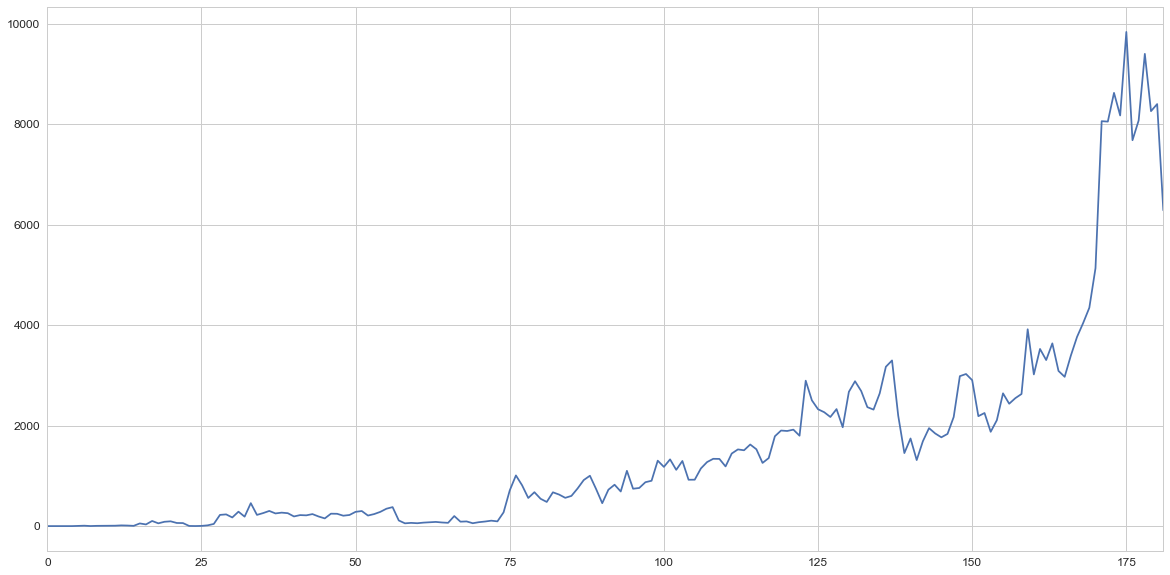

In [289]:
# trend of applications for solar installations
plt.figure(figsize = (20,10))
sns.tsplot(ts_agg['Application_Id'])

### Master dataset creation

In [69]:
# aggregating the required variables
intercon_agg = intercon.groupby(['Service_Zip']).agg({'ElectricVehicleCount': 'median', 'TotalSystemCost': 'median', 
                                                  'ItcCostBasis': 'median','ModuleQuantity': 'median', 
                                                 'InverterQuantity': 'median','AppDuration': 'mean', 
                                                 'ThirdPartyOwned_D': ['sum','count'],'PaceFinanced_D': ['sum','count'], 
                                                 'ElectricVehicle_C': ['sum','count'],'PreviousApp_D': ['sum','count']
                                                }).reset_index()
intercon_agg.head()

Service_Zip ElectricVehicleCount TotalSystemCost ItcCostBasis  \
                            median          median       median   
0       90001                  NaN        15810.80      14990.0   
1       90002                  NaN        17731.00      20879.4   
2       90008                  2.0        27277.25          NaN   
3       90017                  NaN        25120.80          NaN   
4       90022                  NaN        19734.00      20000.0   

  ModuleQuantity InverterQuantity   AppDuration ThirdPartyOwned_D        \
          median           median          mean               sum count   
0           13.0              1.0  2.047304e+15                12    23   
1           13.0              1.0  3.895855e+15                10    33   
2           16.0              1.0  6.929280e+15                 2    10   
3           22.0              1.0  6.048000e+14                 0     1   
4           11.0              1.0  5.017038e+15                11    74   

  PaceFinanced_D       ElectricVehicle_C       PreviousApp_D        
             sum count               sum count           sum count  
0              0    23                 0    23             0    23  
1              2    33                 0    33             0    33  
2              0    10                 1    10             0    10  
3              0     1                 0     1             0     1  
4              0    74                 0    74             0    74

In [70]:
# rename the zip columns
intercon_agg.rename(columns={"Service_Zip":"zip"}, inplace=True)
roof.rename(columns={"region_name":"zip"}, inplace=True)
# join with roof
intercon_roof = intercon_agg.merge(roof, how="inner", on="zip")
intercon_roof.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:558: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,zip,"(zip, )","(ElectricVehicleCount, median)","(TotalSystemCost, median)","(ItcCostBasis, median)","(ModuleQuantity, median)","(InverterQuantity, median)","(AppDuration, mean)","(ThirdPartyOwned_D, sum)","(ThirdPartyOwned_D, count)",...,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,number_of_panels_total,kw_median,kw_total,carbon_offset_metric_tons,existing_installs_count
0,90001,90001,NaN,15810.80,14990.0,13.0,1.0,2.047304e+15,12,23,...,80687,35189,86891,211807,22.0,448122.0,5.50,112030.50,46082.443740,17
1,90002,90002,NaN,17731.00,20879.4,13.0,1.0,3.895855e+15,10,33,...,72550,21865,49871,124085,22.0,288373.0,5.50,72093.25,29639.467690,24
2,90008,90008,2.0,27277.25,NaN,16.0,1.0,6.929280e+15,2,10,...,82629,58079,66847,128883,33.0,384269.0,8.25,96067.25,39713.339200,139
3,90017,90017,NaN,25120.80,NaN,22.0,1.0,6.048000e+14,0,1,...,3868,7389,2695,93426,81.0,108764.0,20.25,27191.00,10826.631490,11
4,90022,90022,NaN,19734.00,20000.0,11.0,1.0,5.017038e+15,11,74,...,417,59,141,72,24.0,795.0,6.00,198.75,83.754326,0


In [103]:
intercon_roof_zip = intercon_roof.merge(zip_df, how="left", on="zip")
intercon_roof_zip['city'] = list(map(lambda x: x.lower(), intercon_roof_zip['city']))
intercon_roof_zip.head()

,zip,"(zip, )","(ElectricVehicleCount, median)","(TotalSystemCost, median)","(ItcCostBasis, median)","(ModuleQuantity, median)","(InverterQuantity, median)","(AppDuration, mean)","(ThirdPartyOwned_D, sum)","(ThirdPartyOwned_D, count)",...,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,number_of_panels_total,kw_median,kw_total,carbon_offset_metric_tons,existing_installs_count,city
0,90001,90001,NaN,15810.80,14990.0,13.0,1.0,2.047304e+15,12,23,...,35189,86891,211807,22.0,448122.0,5.50,112030.50,46082.443740,17,los angeles
1,90002,90002,NaN,17731.00,20879.4,13.0,1.0,3.895855e+15,10,33,...,21865,49871,124085,22.0,288373.0,5.50,72093.25,29639.467690,24,los angeles
2,90008,90008,2.0,27277.25,NaN,16.0,1.0,6.929280e+15,2,10,...,58079,66847,128883,33.0,384269.0,8.25,96067.25,39713.339200,139,los angeles
3,90017,90017,NaN,25120.80,NaN,22.0,1.0,6.048000e+14,0,1,...,7389,2695,93426,81.0,108764.0,20.25,27191.00,10826.631490,11,los angeles
4,90022,90022,NaN,19734.00,20000.0,11.0,1.0,5.017038e+15,11,74,...,59,141,72,24.0,795.0,6.00,198.75,83.754326,0,los angeles


In [104]:
intercon_roof_zip.to_csv("intercon_roof_zip.csv")

In [107]:
df = pd.read_csv("intercon_roof_zip.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 27 columns):
zip                           908 non-null int64
ElectricVehicleCountMedian    729 non-null float64
TotalSystemCostMedian         869 non-null float64
ItcCostBasisMedian            848 non-null float64
ModuleQuantityMedian          902 non-null float64
InverterQuantityMedian        907 non-null float64
AppDurationAvg                908 non-null float64
ThirdPartyOwnedCnt            908 non-null int64
tot_App_Cnt                   908 non-null int64
PaceFinancedCnt               908 non-null int64
ElectricVehicleCnt            908 non-null int64
PreviousAppCnt                908 non-null int64
count_qualified               908 non-null int64
percent_covered               908 non-null float64
percent_qualified             908 non-null float64
number_of_panels_n            908 non-null int64
number_of_panels_s            908 non-null int64
number_of_panels_e            908 non-null int

In [108]:
df.head()

,zip,ElectricVehicleCountMedian,TotalSystemCostMedian,ItcCostBasisMedian,ModuleQuantityMedian,InverterQuantityMedian,AppDurationAvg,ThirdPartyOwnedCnt,tot_App_Cnt,PaceFinancedCnt,...,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,number_of_panels_total,kw_median,kw_total,carbon_offset_metric_tons,existing_installs_count,city
0,90001,NaN,15810.80,14990.0,13.0,1.0,2.050000e+15,12,23,0,...,35189,86891,211807,22.0,448122.0,5.50,112030.50,46082.443740,17,los angeles
1,90002,NaN,17731.00,20879.4,13.0,1.0,3.900000e+15,10,33,2,...,21865,49871,124085,22.0,288373.0,5.50,72093.25,29639.467690,24,los angeles
2,90008,2.0,27277.25,NaN,16.0,1.0,6.930000e+15,2,10,0,...,58079,66847,128883,33.0,384269.0,8.25,96067.25,39713.339200,139,los angeles
3,90017,NaN,25120.80,NaN,22.0,1.0,6.050000e+14,0,1,0,...,7389,2695,93426,81.0,108764.0,20.25,27191.00,10826.631490,11,los angeles
4,90022,NaN,19734.00,20000.0,11.0,1.0,5.020000e+15,11,74,0,...,59,141,72,24.0,795.0,6.00,198.75,83.754326,0,los angeles


In [113]:
# rename the city column
demo.rename(columns={"geography":"city"}, inplace=True)
demo.head()

,city,Num_households,Total_population,Median_household_income,Poverty_Rate,Unemployment_Rate,Education_rate,House_median_value,Median_rent,Total_Housing_Units,Percenthouses_without_Mortgage
0,manton,151,426,27431,42.3,0.0,17.6,-,623,171,50.0
1,crowley lake,271,884,76250,16.3,0.0,32.8,533200,763,396,54.7
2,ruth,103,184,12917,54.9,0.0,0.0,308900,760,364,78.9
3,bear creek,75,112,33042,23.1,0.0,0.0,-,659,75,100.0
4,elmira,92,208,60833,15.4,0.0,16.4,-,1375,92,47.4


In [114]:
df_demo = df.merge(demo, how="inner", on="city")
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 0 to 849
Data columns (total 37 columns):
zip                               850 non-null int64
ElectricVehicleCountMedian        692 non-null float64
TotalSystemCostMedian             821 non-null float64
ItcCostBasisMedian                802 non-null float64
ModuleQuantityMedian              849 non-null float64
InverterQuantityMedian            850 non-null float64
AppDurationAvg                    850 non-null float64
ThirdPartyOwnedCnt                850 non-null int64
tot_App_Cnt                       850 non-null int64
PaceFinancedCnt                   850 non-null int64
ElectricVehicleCnt                850 non-null int64
PreviousAppCnt                    850 non-null int64
count_qualified                   850 non-null int64
percent_covered                   850 non-null float64
percent_qualified                 850 non-null float64
number_of_panels_n                850 non-null int64
number_of_panels_s             

In [115]:
df_demo.head()

,zip,ElectricVehicleCountMedian,TotalSystemCostMedian,ItcCostBasisMedian,ModuleQuantityMedian,InverterQuantityMedian,AppDurationAvg,ThirdPartyOwnedCnt,tot_App_Cnt,PaceFinancedCnt,...,Num_households,Total_population,Median_household_income,Poverty_Rate,Unemployment_Rate,Education_rate,House_median_value,Median_rent,Total_Housing_Units,Percenthouses_without_Mortgage
0,90001,NaN,15810.80,14990.0,13.0,1.0,2.050000e+15,12,23,0,...,1356311,3918872,51538,17.2,9.2,32.5,496300,1241,1447026,25.2
1,90002,NaN,17731.00,20879.4,13.0,1.0,3.900000e+15,10,33,2,...,1356311,3918872,51538,17.2,9.2,32.5,496300,1241,1447026,25.2
2,90008,2.0,27277.25,NaN,16.0,1.0,6.930000e+15,2,10,0,...,1356311,3918872,51538,17.2,9.2,32.5,496300,1241,1447026,25.2
3,90017,NaN,25120.80,NaN,22.0,1.0,6.050000e+14,0,1,0,...,1356311,3918872,51538,17.2,9.2,32.5,496300,1241,1447026,25.2
4,90022,NaN,19734.00,20000.0,11.0,1.0,5.020000e+15,11,74,0,...,1356311,3918872,51538,17.2,9.2,32.5,496300,1241,1447026,25.2


In [116]:
df_demo.to_csv("demo_final.csv")

In [165]:
demo_fn = pd.read_csv("demo_final.csv")
demo_fn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 37 columns):
zip                               850 non-null int64
ElectricVehicleCountMedian        692 non-null float64
TotalSystemCostMedian             821 non-null float64
ItcCostBasisMedian                802 non-null float64
ModuleQuantityMedian              849 non-null float64
InverterQuantityMedian            850 non-null float64
AppDurationAvg                    850 non-null float64
ThirdPartyOwnedCnt                850 non-null int64
tot_App_Cnt                       850 non-null int64
PaceFinancedCnt                   850 non-null int64
ElectricVehicleCnt                850 non-null int64
PreviousAppCnt                    850 non-null int64
count_qualified                   850 non-null int64
percent_covered                   850 non-null float64
percent_qualified                 850 non-null float64
number_of_panels_n                850 non-null int64
number_of_panels_s             

In [166]:
demo_fn['solar_penetration'] = demo_fn['existing_installs_count']/demo_fn['count_qualified']
demo_fn['ThirdPartyOwnedPerc'] = demo_fn['ThirdPartyOwnedCnt']/demo_fn['tot_App_Cnt']
demo_fn['PaceFinancedPerc'] = demo_fn['PaceFinancedCnt']/demo_fn['tot_App_Cnt']
demo_fn['ElectricVehiclePerc'] = demo_fn['ElectricVehicleCnt']/demo_fn['tot_App_Cnt']
demo_fn['PreviousAppPerc'] = demo_fn['PreviousAppCnt']/demo_fn['tot_App_Cnt']
demo_fn['Percenthouses_without_Mortgage'] = demo_fn['Percenthouses_without_Mortgage'].astype(float)

In [167]:
# aggregating the required variables
df_agg = demo_fn.groupby(['city']).agg({'ElectricVehicleCountMedian': 'mean', 'TotalSystemCostMedian': 'mean', 
                                        'ItcCostBasisMedian': 'mean','ModuleQuantityMedian': 'mean', 
                                        'InverterQuantityMedian': 'mean','AppDurationAvg': 'mean', 
                                        'solar_penetration': 'mean',
                                        'ThirdPartyOwnedPerc': 'mean','PaceFinancedPerc': 'mean', 
                                        'ElectricVehiclePerc': 'mean','PreviousAppPerc': 'mean',
                                        'count_qualified': 'sum', 'percent_covered': 'mean',
                                        'percent_qualified': 'mean', 'existing_installs_count': 'sum',
                                        'Num_households': 'mean', 'Total_population': 'mean',
                                        'Median_household_income': 'mean','Poverty_Rate': 'mean',
                                        'Unemployment_Rate': 'mean','Education_rate': 'mean',
                                        'House_median_value': 'mean','Median_rent': 'mean',
                                        'Total_Housing_Units': 'max','Percenthouses_without_Mortgage': 'max'
                                       }).reset_index()
df_agg.head()

,city,ElectricVehicleCountMedian,TotalSystemCostMedian,ItcCostBasisMedian,ModuleQuantityMedian,InverterQuantityMedian,AppDurationAvg,solar_penetration,ThirdPartyOwnedPerc,PaceFinancedPerc,...,Num_households,Total_population,Median_household_income,Poverty_Rate,Unemployment_Rate,Education_rate,House_median_value,Median_rent,Total_Housing_Units,Percenthouses_without_Mortgage
0,acampo,0.0,32666.5,0.0,34.0,1.0,6.750000e+15,0.032184,0.036765,0.007353,...,178.0,466.0,155385.0,0.0,0.0,30.0,0,0.0,178,0.0
1,adelanto,NaN,19506.0,17130.0,14.0,1.0,2.320000e+15,0.002093,0.391304,0.043478,...,8031.0,32311.0,29647.0,39.4,22.0,6.1,129900,1034.0,9144,20.9
2,agoura hills,1.0,29100.5,24362.5,16.0,1.0,5.000000e+15,0.066889,0.466307,0.008086,...,7342.0,20689.0,114313.0,4.9,5.3,53.7,699200,1998.0,7735,16.9
3,alameda,NaN,NaN,NaN,7.5,4.0,5.360000e+15,0.011992,0.000000,0.000000,...,30678.0,77409.0,83048.0,6.9,6.4,50.3,677000,1478.0,32349,29.2
4,alamo,0.0,35611.0,0.0,28.0,1.0,5.080000e+15,0.197761,0.028571,0.002381,...,5439.0,16078.0,171767.0,1.2,4.3,72.4,1411800,2911.0,5677,21.1


### Exploratory Data Analyses

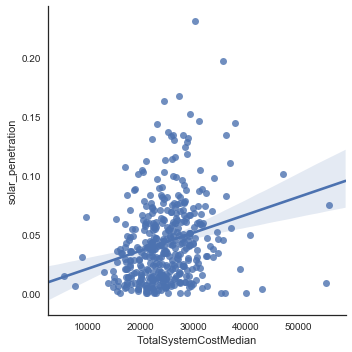

In [168]:
sns.lmplot(x="TotalSystemCostMedian", y="solar_penetration", data=df_agg)

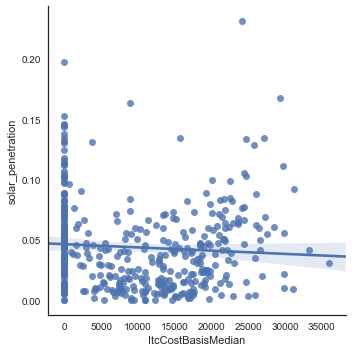

In [169]:
sns.lmplot(x="ItcCostBasisMedian", y="solar_penetration", data=df_agg)

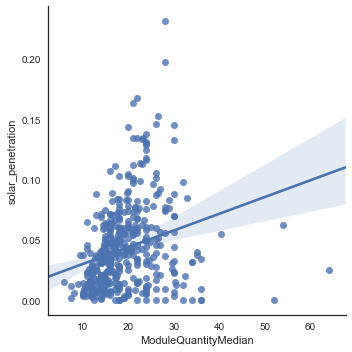

In [170]:
sns.lmplot(x="ModuleQuantityMedian", y="solar_penetration", data=df_agg[df_agg['ModuleQuantityMedian']<100])

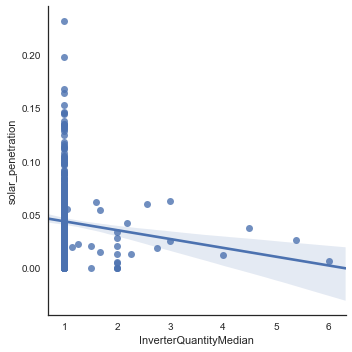

In [171]:
sns.lmplot(x="InverterQuantityMedian", y="solar_penetration", data=df_agg[df_agg['InverterQuantityMedian']<20])

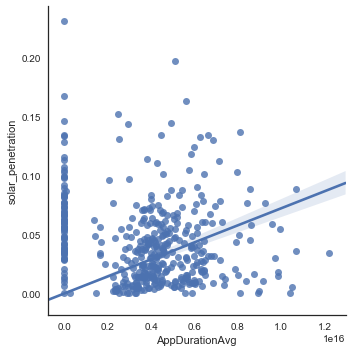

In [172]:
sns.lmplot(x="AppDurationAvg", y="solar_penetration", data=df_agg[df_agg['AppDurationAvg']<20000000000000000])

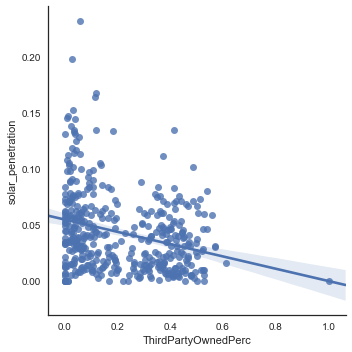

In [173]:
sns.lmplot(x="ThirdPartyOwnedPerc", y="solar_penetration", data=df_agg)

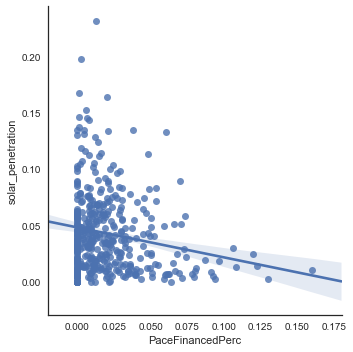

In [174]:
sns.lmplot(x="PaceFinancedPerc", y="solar_penetration", data=df_agg)

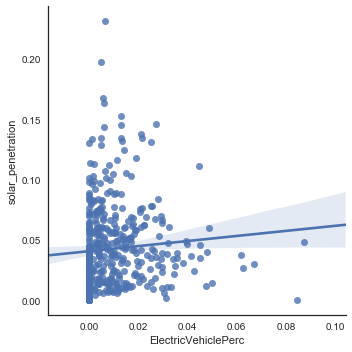

In [175]:
sns.lmplot(x="ElectricVehiclePerc", y="solar_penetration", data=df_agg[df_agg['ElectricVehiclePerc']<0.15])

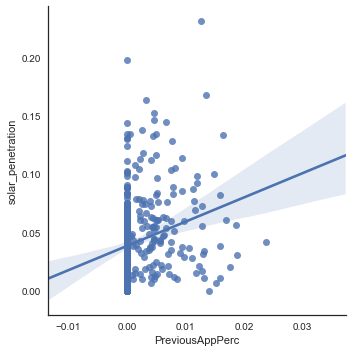

In [176]:
sns.lmplot(x="PreviousAppPerc", y="solar_penetration", data=df_agg[df_agg['PreviousAppPerc']<0.04])

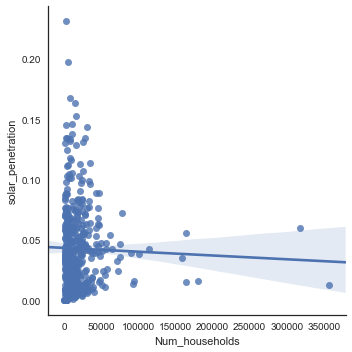

In [177]:
sns.lmplot(x="Num_households", y="solar_penetration", data=df_agg[df_agg['Num_households']<400000])

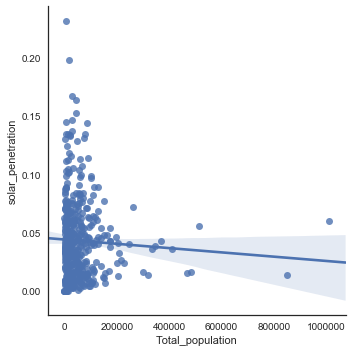

In [178]:
sns.lmplot(x="Total_population", y="solar_penetration", data=df_agg[df_agg['Num_households']<400000])

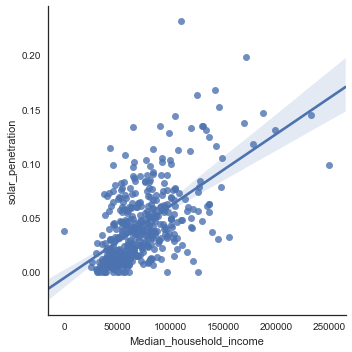

In [179]:
sns.lmplot(x="Median_household_income", y="solar_penetration", data=df_agg)

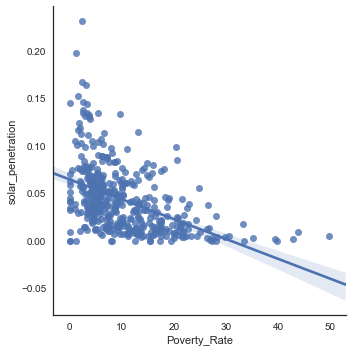

In [180]:
sns.lmplot(x="Poverty_Rate", y="solar_penetration", data=df_agg)

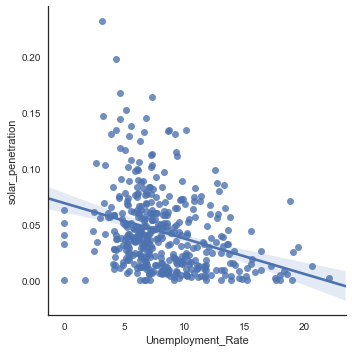

In [181]:
sns.lmplot(x="Unemployment_Rate", y="solar_penetration", data=df_agg)

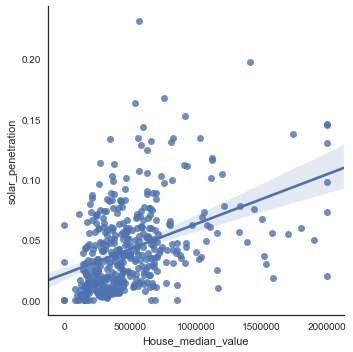

In [182]:
sns.lmplot(x="House_median_value", y="solar_penetration", data=df_agg)

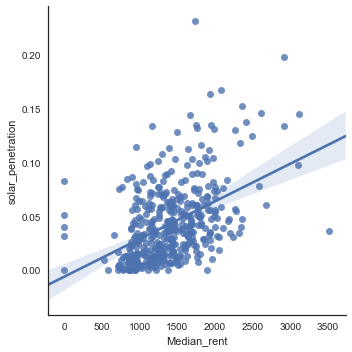

In [183]:
sns.lmplot(x="Median_rent", y="solar_penetration", data=df_agg)

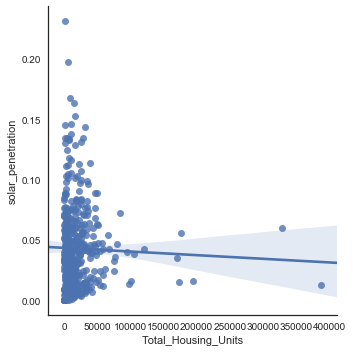

In [184]:
sns.lmplot(x="Total_Housing_Units", y="solar_penetration", data=df_agg[df_agg['Total_Housing_Units']<400000])

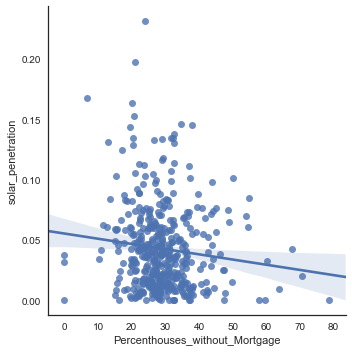

In [185]:
sns.lmplot(x="Percenthouses_without_Mortgage", y="solar_penetration", data=df_agg)

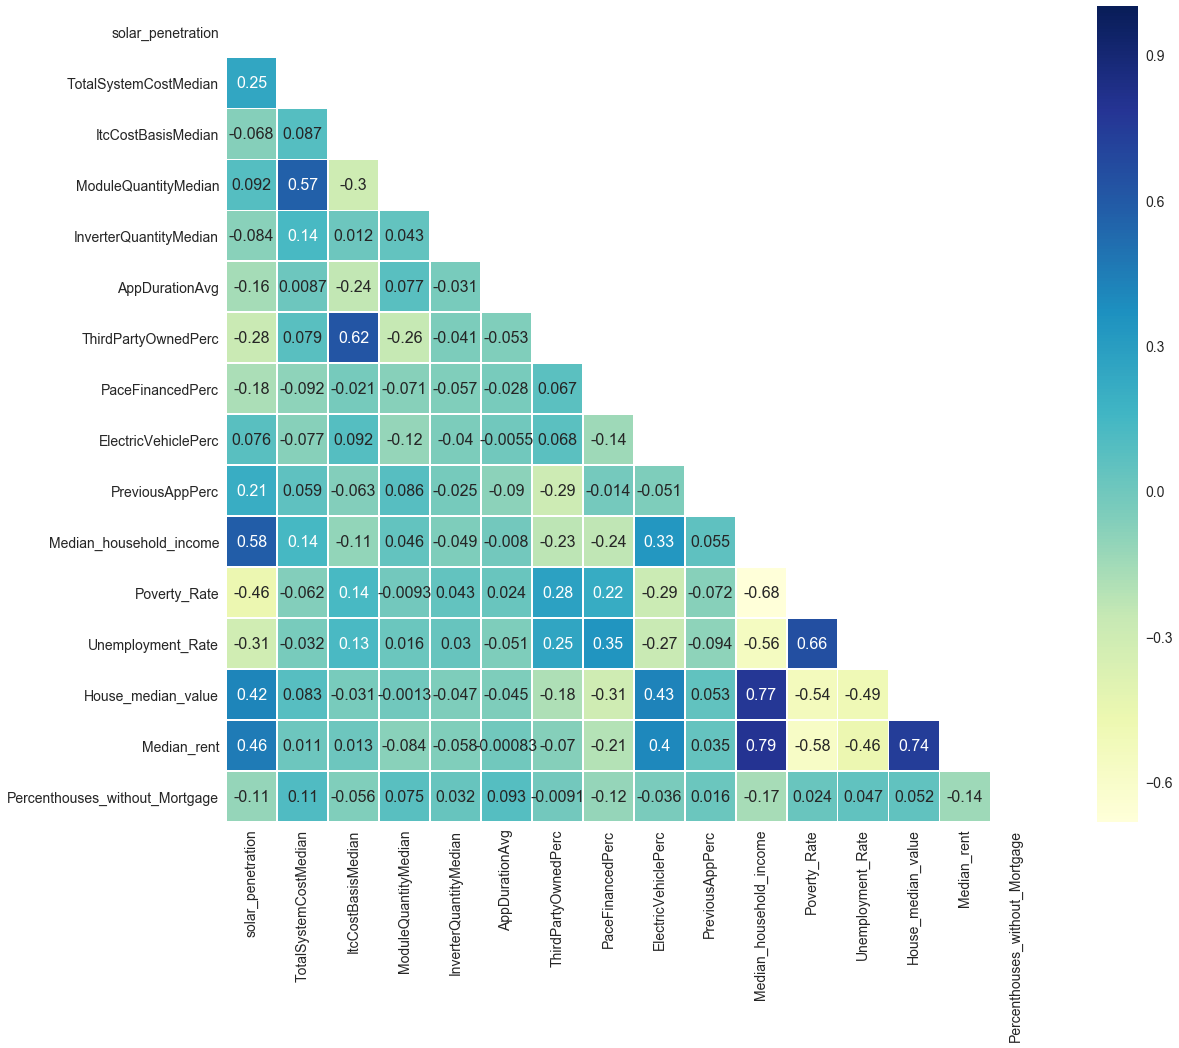

In [203]:
model_df = df_agg[['solar_penetration','TotalSystemCostMedian',
'ItcCostBasisMedian',
'ModuleQuantityMedian',
'InverterQuantityMedian',
'AppDurationAvg',
'ThirdPartyOwnedPerc',
'PaceFinancedPerc',
'ElectricVehiclePerc',
'PreviousAppPerc',
'Median_household_income',
'Poverty_Rate',
'Unemployment_Rate',
'House_median_value',
'Median_rent',
'Percenthouses_without_Mortgage']]
plt.subplots(figsize=(20,15))
mask = np.zeros_like(model_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(model_df.corr(), mask=mask, vmax=1, annot=True,
           square=True, cmap='YlGnBu', linewidths=.5, annot_kws={"size": 16})

### Regression Analysis

In [208]:
# Build a linear model with candidate variables
linReg = smf.ols('solar_penetration ~ TotalSystemCostMedian + ItcCostBasisMedian + ModuleQuantityMedian + InverterQuantityMedian + AppDurationAvg + ThirdPartyOwnedPerc + PaceFinancedPerc + ElectricVehiclePerc + PreviousAppPerc + Median_household_income + Poverty_Rate + Unemployment_Rate + House_median_value + Median_rent + Percenthouses_without_Mortgage',
                 data=model_df).fit()
linReg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      solar_penetration   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     53.50
Date:                Wed, 16 May 2018   Prob (F-statistic):           1.56e-42
Time:                        07:44:37   Log-Likelihood:                 888.02
No. Observations:                 409   AIC:                            -1764.
Df Residuals:                     403   BIC:                            -1740.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -6.453e-06   2.33e-06     -2.768      0.006    -1.1e-05   -1.87e-06
TotalSystemCostMedian           1.058e-06   2.45e-07      4.313      0.000    5.76e-07    1.54e-06
ItcCostBasisMedian             -2.567e-07    1.6e-07     -1.600      0.110   -5.72e-07    5.88e-08
ModuleQuantityMedian           -7.432e-05   2.73e-05     -2.718      0.007      -0.000   -2.06e-05
InverterQuantityMedian         -9.978e-06   3.65e-06     -2.735      0.007   -1.72e-05   -2.81e-06
AppDurationAvg                 -2.325e-18   5.13e-19     -4.533      0.000   -3.33e-18   -1.32e-18
ThirdPartyOwnedPerc            -6.953e-07   2.68e-07     -2.597      0.010   -1.22e-06   -1.69e-07
PaceFinancedPerc               -4.476e-07   1.77e-07     -2.535      0.012   -7.95e-07      -1e-07
ElectricVehiclePerc             9.652e-08    3.8e-08      2.540      0.011    2.18e-08    1.71e-07
PreviousAppPerc                -5.002e-09   6.61e-09     -0.757      0.450    -1.8e-08    7.99e-09
Median_household_income         5.953e-07   9.37e-08      6.354      0.000    4.11e-07     7.8e-07
Poverty_Rate                      -0.0005      0.000     -2.517      0.012      -0.001      -0.000
Unemployment_Rate                 -0.0002    6.8e-05     -2.597      0.010      -0.000    -4.3e-05
House_median_value             -8.796e-09    6.6e-09     -1.333      0.183   -2.18e-08    4.18e-09
Median_rent                     9.071e-08   5.06e-06      0.018      0.986   -9.86e-06       1e-05
Percenthouses_without_Mortgage  -6.62e-05      0.000     -0.434      0.664      -0.000       0.000
==============================================================================
Omnibus:                       77.759   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.114
Skew:                           0.999   Prob(JB):                     1.40e-36
Kurtosis:                       5.386   Cond. No.                     9.63e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.63e+17. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [215]:
# Build a second linear model with fewer and stronger candidate variables
linReg_v2 = smf.ols('solar_penetration ~ TotalSystemCostMedian + InverterQuantityMedian + AppDurationAvg + ThirdPartyOwnedPerc + PaceFinancedPerc + ElectricVehiclePerc + PreviousAppPerc + Median_household_income + Poverty_Rate',
                 data=model_df).fit()
linReg_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      solar_penetration   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     135.1
Date:                Wed, 16 May 2018   Prob (F-statistic):           6.93e-46
Time:                        07:53:17   Log-Likelihood:                 904.12
No. Observations:                 417   AIC:                            -1802.
Df Residuals:                     414   BIC:                            -1790.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -1.36e-05   3.48e-06     -3.906      0.000   -2.04e-05   -6.76e-06
TotalSystemCostMedian    8.898e-07    1.9e-07      4.687      0.000    5.17e-07    1.26e-06
InverterQuantityMedian  -7.954e-06   2.04e-06     -3.906      0.000    -1.2e-05   -3.95e-06
AppDurationAvg           -1.61e-18   3.69e-19     -4.359      0.000   -2.34e-18   -8.84e-19
ThirdPartyOwnedPerc     -5.259e-06   1.35e-06     -3.906      0.000    -7.9e-06   -2.61e-06
PaceFinancedPerc        -7.325e-07   1.88e-07     -3.906      0.000    -1.1e-06   -3.64e-07
ElectricVehiclePerc      2.907e-08   7.44e-09      3.906      0.000    1.44e-08    4.37e-08
PreviousAppPerc          6.373e-09   1.63e-09      3.906      0.000    3.17e-09    9.58e-09
Median_household_income  4.903e-07   4.69e-08     10.445      0.000    3.98e-07    5.83e-07
Poverty_Rate               -0.0008      0.000     -3.906      0.000      -0.001      -0.000
==============================================================================
Omnibus:                       83.231   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.737
Skew:                           1.037   Prob(JB):                     3.44e-40
Kurtosis:                       5.482   Cond. No.                     1.07e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+18. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [216]:
# Build a third model with final variables
linReg_v3 = smf.ols('solar_penetration ~ TotalSystemCostMedian + ThirdPartyOwnedPerc + ElectricVehiclePerc + PreviousAppPerc + Median_household_income + Poverty_Rate',
                 data=model_df).fit()
linReg_v3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      solar_penetration   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     49.95
Date:                Wed, 16 May 2018   Prob (F-statistic):           5.49e-46
Time:                        07:53:21   Log-Likelihood:                 913.77
No. Observations:                 417   AIC:                            -1814.
Df Residuals:                     410   BIC:                            -1785.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.0117      0.008     -1.399      0.163      -0.028       0.005
TotalSystemCostMedian    1.029e-06   2.41e-07      4.274      0.000    5.56e-07     1.5e-06
ThirdPartyOwnedPerc        -0.0248      0.009     -2.913      0.004      -0.042      -0.008
ElectricVehiclePerc        -0.2050      0.087     -2.352      0.019      -0.376      -0.034
PreviousAppPerc             0.7703      0.257      2.994      0.003       0.265       1.276
Median_household_income  5.489e-07   6.14e-08      8.940      0.000    4.28e-07     6.7e-07
Poverty_Rate               -0.0005      0.000     -2.013      0.045      -0.001   -1.17e-05
==============================================================================
Omnibus:                       69.718   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.682
Skew:                           0.908   Prob(JB):                     2.83e-31
Kurtosis:                       5.190   Cond. No.                     1.60e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Clustering

In [255]:
# Standardize the variables
df_agg2 = df_agg.loc[(df_agg['existing_installs_count']<=5000) & (df_agg['ElectricVehiclePerc']<=0.2)]
df_std = df_agg2[['existing_installs_count','Poverty_Rate','PaceFinancedPerc','Education_rate','ElectricVehiclePerc']]
scaler = MinMaxScaler()
scaler.fit(df_std)
scaler.transform(df_std)

array([[0.00432099, 0.        , 0.04595588, 0.29577465, 0.08403361],
       [0.0037037 , 0.79116466, 0.27173913, 0.0368364 , 0.        ],
       [0.15493827, 0.09839357, 0.05053908, 0.55254605, 0.33885252],
       ...,
       [0.0117284 , 0.02008032, 0.        , 0.51570964, 0.        ],
       [0.48055556, 0.30522088, 0.10733947, 0.16251354, 0.02735866],
       [0.31203704, 0.26104418, 0.28125   , 0.18634886, 0.        ]])

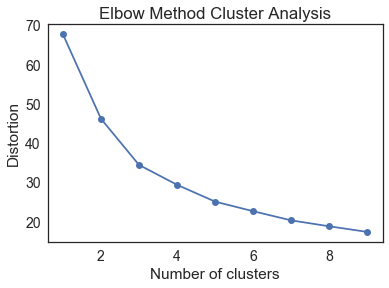

In [256]:
# Use elbow method to decide on the ideal number of clusters
distortions = []
for i in range(1, 10):
    km = KMeans(n_clusters=i,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)
    km.fit(scaler.transform(df_std))
    distortions.append(km.inertia_)
    
plt.plot(range(1,10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title("Elbow Method Cluster Analysis")
plt.show()

In [257]:
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)
kmeans = km.fit(scaler.transform(df_std))
y_km = km.fit_predict(scaler.transform(df_std))
df_agg2['cluster'] = kmeans.labels_

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


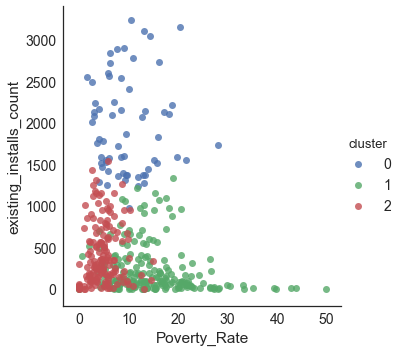

In [258]:
sns.lmplot(x="Poverty_Rate", y="existing_installs_count", hue="cluster", data=df_agg2, fit_reg=False)

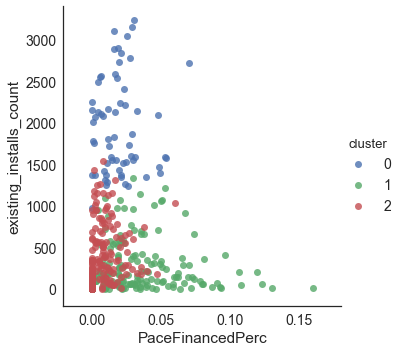

In [259]:
sns.lmplot(x="PaceFinancedPerc", y="existing_installs_count", hue="cluster", data=df_agg2, fit_reg=False)

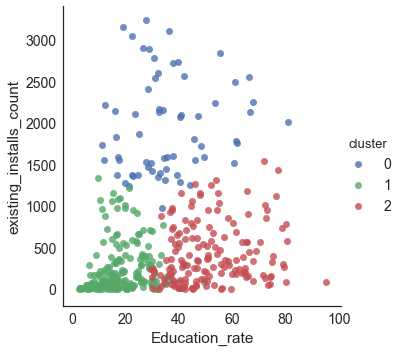

In [260]:
sns.lmplot(x="Education_rate", y="existing_installs_count", hue="cluster", data=df_agg2, fit_reg=False)

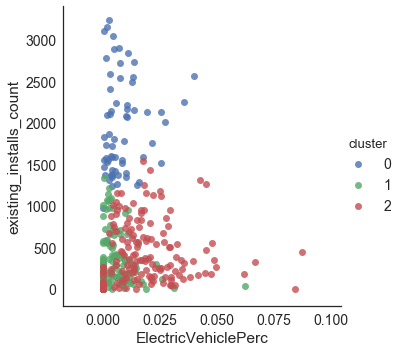

In [261]:
sns.lmplot(x="ElectricVehiclePerc", y="existing_installs_count", hue="cluster", data=df_agg2, fit_reg=False)

In [262]:
# Silhoutte plot
# create a subset of the clusters as the silhoutte plot is memory intensive and cannot handle 54k rows at one time
df_std['y_km'] = y_km
df0 = df_std[df_std.y_km == 0]
df1 = df_std[df_std.y_km == 1]
df2 = df_std[df_std.y_km == 2]
final_df = df0.append(df1).append(df2)
final_x = final_df.drop('y_km', axis=1)
final_y = final_df['y_km']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


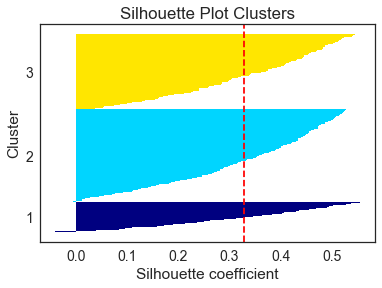

In [265]:
cluster_labels = np.unique(final_y)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(scaler.transform(final_x),
                                     final_y,
                                     metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[final_y == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none',color=color)
    yticks.append((y_ax_lower + y_ax_upper)/2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color="red",
            linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Plot Clusters')
plt.show()

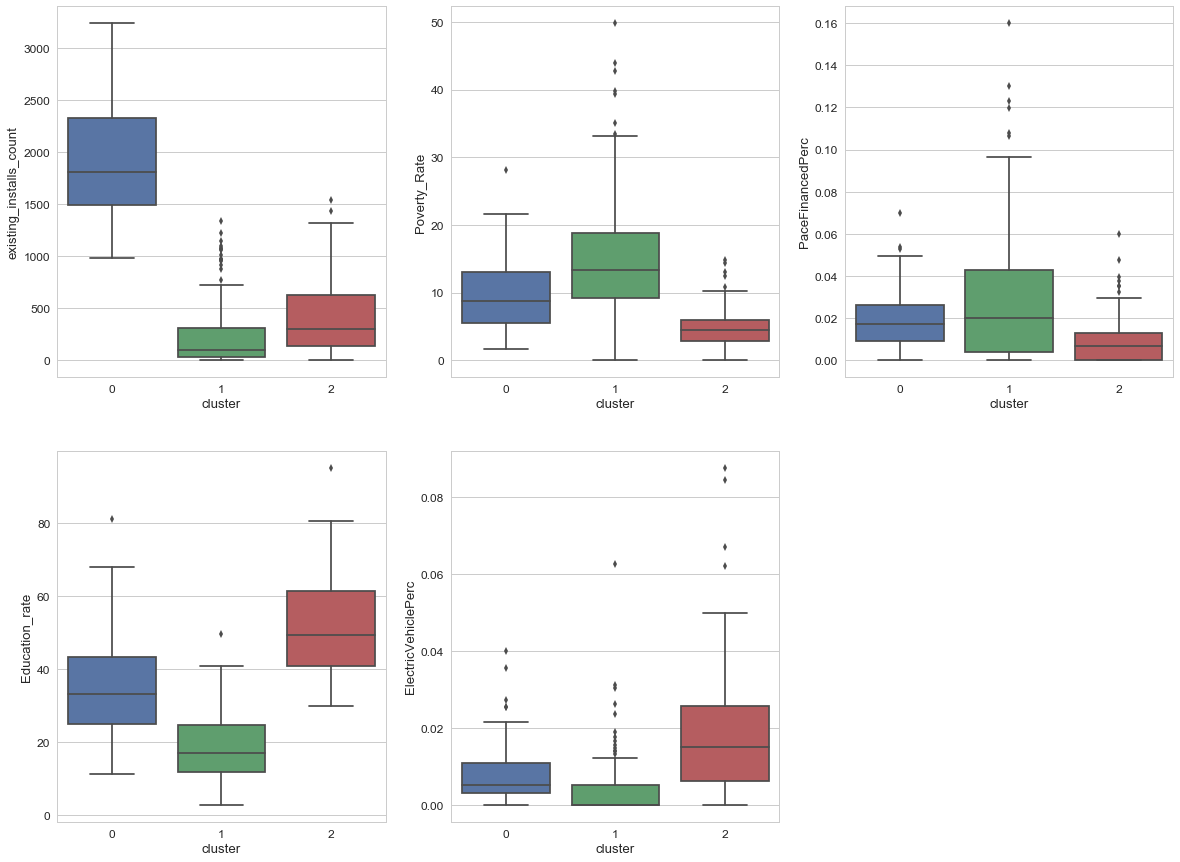

In [267]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(2,3,1)
sns.boxplot(x='cluster', y='existing_installs_count', data=df_agg2)
plt.subplot(2,3,2)
sns.boxplot(x='cluster', y='Poverty_Rate', data=df_agg2)
plt.subplot(2,3,3)
sns.boxplot(x='cluster', y='PaceFinancedPerc', data=df_agg2)
plt.subplot(2,3,4)
sns.boxplot(x='cluster', y='Education_rate', data=df_agg2)
plt.subplot(2,3,5)
sns.boxplot(x='cluster', y='ElectricVehiclePerc', data=df_agg2)
plt.show()